In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


## ~~ Data Exploration

In [2]:
data_file = Path("Resources/Netflix.csv")
df_Netflix = pd.read_csv(data_file)
df_Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [3]:
df_Netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [4]:
df_Netflix.shape

(7787, 12)

In [5]:
df_Netflix.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


In [6]:
df_Netflix.groupby('country').count()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,genres,description
country,,,,,,,,,,,
Argentina,50,50,50,36,46,50,50,50,50,50,50
"Argentina, Brazil, France, Poland, Germany, Denmark",1,1,1,1,1,1,1,1,1,1,1
"Argentina, Chile",1,1,1,1,1,1,1,1,1,1,1
"Argentina, Chile, Peru",1,1,1,1,1,1,1,1,1,1,1
"Argentina, France",1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,1,1,1,1,1,1,1,1,1,1,1
"Venezuela, Colombia",1,1,1,1,0,1,1,1,1,1,1
Vietnam,5,5,5,5,5,5,5,5,5,5,5


In [7]:
df_split_country = df_Netflix['country'].str.split(',', expand=True)
df_split_country.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Brazil,None,None,None,None,None,None,None,None,None,None,None
1,India,None,None,None,None,None,None,None,None,None,None,None
2,Indonesia,None,None,None,None,None,None,None,None,None,None,None
3,United States,None,None,None,None,None,None,None,None,None,None,None
4,United Kingdom,None,None,None,None,None,None,None,None,None,None,None


In [8]:
df_Netflix_merged_country = pd.merge(df_Netflix, df_split_country, left_index=True, right_index=True)
df_Netflix_merged_country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,2,3,4,5,6,7,8,9,10,11
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,...,None,None,None,None,None,None,None,None,None,None
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,...,None,None,None,None,None,None,None,None,None,None
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,...,None,None,None,None,None,None,None,None,None,None
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,...,None,None,None,None,None,None,None,None,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,...,None,None,None,None,None,None,None,None,None,None


In [9]:
df_Netflix_merged_country.drop(columns=['country'], inplace=True)
df_Netflix_merged_country.head()


,show_id,type,title,director,cast,date_added,release_year,rating,duration,genres,...,2,3,4,5,6,7,8,9,10,11
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,None,None,None,None,None,None,None,None,None,None
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",...,None,None,None,None,None,None,None,None,None,None
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",...,None,None,None,None,None,None,None,None,None,None
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,Comedies,...,None,None,None,None,None,None,None,None,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",...,None,None,None,None,None,None,None,None,None,None


In [10]:
df_Netflix_merged_country =  df_Netflix_merged_country.rename(columns = {0:'country1',
                                                                        1:'country2',
                                                                        2:'country3',
                                                                        3:'country4',
                                                                        4:'country5',
                                                                        5:'country6',
                                                                        6:'country7',
                                                                        7:'country8',
                                                                        8:'country9',
                                                                        9:'country10',
                                                                        10:'country11',
                                                                        11:'country12'})
df_Netflix_merged_country.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,genres,...,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,None,None,None,None,None,None,None,None,None,None
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",...,None,None,None,None,None,None,None,None,None,None
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",...,None,None,None,None,None,None,None,None,None,None
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,Comedies,...,None,None,None,None,None,None,None,None,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",...,None,None,None,None,None,None,None,None,None,None


In [11]:
df_Netflix_merged_country.drop(columns=['country7','country8','country9','country10', 'country11', 'country12'])
df_Netflix_merged_country.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,genres,...,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,None,None,None,None,None,None,None,None,None,None
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",...,None,None,None,None,None,None,None,None,None,None
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",...,None,None,None,None,None,None,None,None,None,None
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,Comedies,...,None,None,None,None,None,None,None,None,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",...,None,None,None,None,None,None,None,None,None,None


In [12]:
df_split_genre= df_Netflix['genres'].str.split(',', expand=True)
df_split_genre.head()

,0,1,2
0,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,Horror Movies,International Movies,Thrillers
2,Dramas,International Movies,Sports Movies
3,Comedies,None,None
4,British TV Shows,Docuseries,Science & Nature TV


In [13]:
df_Netflix_merged_country_genre = pd.merge(df_Netflix_merged_country, df_split_genre, left_index=True, right_index=True)
df_Netflix_merged_country_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,genres,...,country6,country7,country8,country9,country10,country11,country12,0,1,2
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,None,None,None,None,None,None,None,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",...,None,None,None,None,None,None,None,Horror Movies,International Movies,Thrillers
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",...,None,None,None,None,None,None,None,Dramas,International Movies,Sports Movies
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,Comedies,...,None,None,None,None,None,None,None,Comedies,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",...,None,None,None,None,None,None,None,British TV Shows,Docuseries,Science & Nature TV


In [14]:
df_Netflix_merged_country_genre.drop(columns=['genres'], inplace=True)
df_Netflix_merged_country_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,...,country6,country7,country8,country9,country10,country11,country12,0,1,2
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...,...,None,None,None,None,None,None,None,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...,...,None,None,None,None,None,None,None,Horror Movies,International Movies,Thrillers
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...,...,None,None,None,None,None,None,None,Dramas,International Movies,Sports Movies
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...,...,None,None,None,None,None,None,None,Comedies,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...,...,None,None,None,None,None,None,None,British TV Shows,Docuseries,Science & Nature TV


In [15]:
df_Netflix_merged_country_genre =  df_Netflix_merged_country_genre.rename(columns = {0:'genre1',
                                                                                    1:'genre2',
                                                                                    2:'genre3',
                                                                                    })
df_Netflix_merged_country_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,...,country6,country7,country8,country9,country10,country11,country12,genre1,genre2,genre3
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...,...,None,None,None,None,None,None,None,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...,...,None,None,None,None,None,None,None,Horror Movies,International Movies,Thrillers
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...,...,None,None,None,None,None,None,None,Dramas,International Movies,Sports Movies
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...,...,None,None,None,None,None,None,None,Comedies,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...,...,None,None,None,None,None,None,None,British TV Shows,Docuseries,Science & Nature TV


In [16]:
df_Netflix_merged_country_genre.groupby(["type"]).count()

,show_id,title,director,cast,date_added,release_year,rating,duration,description,country1,...,country6,country7,country8,country9,country10,country11,country12,genre1,genre2,genre3
type,,,,,,,,,,,,,,,,,,,,,
Movie,5377,5377,5214,4951,5377,5377,5372,5377,5377,5147,...,19,8,3,2,2,1,1,5377,4063,2106
TV Show,2410,2410,184,2118,2400,2410,2408,2410,2410,2133,...,3,0,0,0,0,0,0,2410,1923,1192


In [17]:
df_Netflix_merged_country_genre.groupby(["release_year"]).count().sort_values(ascending=False, by='show_id').head(10)

,show_id,type,title,director,cast,date_added,rating,duration,description,country1,...,country6,country7,country8,country9,country10,country11,country12,genre1,genre2,genre3
release_year,,,,,,,,,,,,,,,,,,,,,
2018,1121,1121,1121,728,1000,1120,1121,1121,1121,1021,...,2,0,0,0,0,0,0,1121,853,482
2017,1012,1012,1012,750,893,1012,1010,1012,1012,958,...,5,2,1,1,1,1,1,1012,719,377
2019,996,996,996,578,882,996,996,996,996,899,...,3,3,1,0,0,0,0,996,753,429
2016,882,882,882,637,783,881,882,882,882,820,...,2,1,0,0,0,0,0,882,667,354
2020,868,868,868,441,753,868,868,868,868,805,...,0,0,0,0,0,0,0,868,646,356
2015,541,541,541,385,496,539,538,541,541,502,...,1,0,0,0,0,0,0,541,440,259
2014,334,334,334,247,310,334,334,334,334,315,...,2,1,1,1,1,0,0,334,265,146
2013,267,267,267,204,248,266,266,267,267,257,...,2,1,0,0,0,0,0,267,216,125
2012,219,219,219,159,208,218,219,219,219,208,...,2,0,0,0,0,0,0,219,171,102


In [18]:
df_Netflix_merged_country_genre.groupby(["genre1"]).count().sort_values(ascending=False, by='show_id').head(10)


,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,...,country5,country6,country7,country8,country9,country10,country11,country12,genre2,genre3
genre1,,,,,,,,,,,,,,,,,,,,,
Dramas,1384,1384,1384,1373,1378,1384,1384,1383,1384,1384,...,20,8,2,1,0,0,0,0,1267,694
Comedies,1074,1074,1074,1056,1068,1074,1074,1074,1074,1074,...,3,0,0,0,0,0,0,0,977,664
Documentaries,751,751,751,707,386,751,751,751,751,751,...,12,3,2,2,2,2,1,1,417,84
Action & Adventure,721,721,721,714,715,721,721,721,721,721,...,5,2,1,0,0,0,0,0,622,394
International TV Shows,690,690,690,46,666,689,690,690,690,690,...,1,0,0,0,0,0,0,0,688,509
Children & Family Movies,502,502,502,471,475,502,502,502,502,502,...,6,3,2,0,0,0,0,0,325,95
Crime TV Shows,369,369,369,46,314,369,369,369,369,369,...,0,0,0,0,0,0,0,0,369,304
Kids' TV,359,359,359,15,325,357,359,358,359,359,...,1,0,0,0,0,0,0,0,154,32
Stand-Up Comedy,321,321,321,296,320,321,321,321,321,321,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_Netflix_merged_country_genre.drop(columns=['country2','country3','country4','country5','country6','country7','country8','country9','country10', 'country11', 'country12'],inplace=True)
df_Netflix_merged_country_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,country1,genre1,genre2,genre3
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...,Brazil,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...,India,Horror Movies,International Movies,Thrillers
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...,Indonesia,Dramas,International Movies,Sports Movies
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...,United States,Comedies,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...,United Kingdom,British TV Shows,Docuseries,Science & Nature TV


In [20]:
df_Netflix_merged_country_genre.drop(columns=['genre2','genre3'],inplace=True)
df_Netflix_merged_country_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,country1,genre1
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...,Brazil,International TV Shows
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...,India,Horror Movies
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...,Indonesia,Dramas
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...,United States,Comedies
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...,United Kingdom,British TV Shows


In [31]:
df_Netflix_merged_country_genre = df_Netflix_merged_country_genre.rename(columns={'show_id' :'Show ID',
                                                'type' : 'Type',
                                                'title':'Title',
                                                'director':'Director',
                                                'cast':'Cast',
                                                'date_added': 'Date',
                                                'release_year': 'Release Year',
                                                'rating': 'Rating',
                                                'duration':'Duration',
                                                'description': 'Description',
                                                'country1': 'Country',
                                                'genre1': 'Genre'
})
df_Netflix_merged_country_genre

,Show ID,Type,Title,Director,Cast,Date,Release Year,Rating,Duration,Description,Country,Genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...,Brazil,International TV Shows
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...,India,Horror Movies
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...,Indonesia,Dramas
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...,United States,Comedies
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...,United Kingdom,British TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s995,TV Show,Blown Away,NaN,NaN,12-Jul-19,2019,TV-14,1,Ten master artists turn up the heat in glassbl...,Canada,International TV Shows
7783,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",01-Sep-20,2017,TV-MA,2,Determined to throw off the curse of being Sat...,Japan,Anime Series
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",26-Aug-16,2013,NC-17,180,"Determined to fall in love, 15-year-old Adele ...",France,Dramas
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",08-Mar-19,2013,PG-13,98,The high life leads to high anxiety for a fash...,United States,Comedies


In [32]:
df_Netflix_merged_country_genre=df_Netflix_merged_country_genre[['Show ID','Type','Genre','Title','Director','Cast','Country',
                                                                'Date','Release Year','Rating',
                                                                 'Duration','Description']]
df_Netflix_merged_country_genre

,Show ID,Type,Genre,Title,Director,Cast,Country,Date,Release Year,Rating,Duration,Description
0,s1,TV Show,International TV Shows,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...
1,s10,Movie,Horror Movies,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...
2,s100,Movie,Dramas,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...
3,s1000,Movie,Comedies,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,British TV Shows,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s995,TV Show,International TV Shows,Blown Away,NaN,NaN,Canada,12-Jul-19,2019,TV-14,1,Ten master artists turn up the heat in glassbl...
7783,s996,TV Show,Anime Series,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,01-Sep-20,2017,TV-MA,2,Determined to throw off the curse of being Sat...
7784,s997,Movie,Dramas,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",France,26-Aug-16,2013,NC-17,180,"Determined to fall in love, 15-year-old Adele ..."
7785,s998,Movie,Comedies,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,08-Mar-19,2013,PG-13,98,The high life leads to high anxiety for a fash...


## ~~ Data Visualization

In [137]:
Vis_Netflix = df_Netflix_merged_country_genre.loc[df_Netflix_merged_country_genre['Country'] != 'United States',:]
Vis_Netflix_TV = Vis_Netflix.loc[Vis_Netflix['Type'] == 'TV Show',:]
Vis_Netflix_Movie = Vis_Netflix.loc[Vis_Netflix['Type'] == 'Movie',:]
Vis_Netflix_Drama = Vis_Netflix.loc[Vis_Netflix['Genre'] == 'Dramas',:]
Vis_Netflix_Rating = Vis_Netflix.loc[Vis_Netflix['Rating'] == 'TV-MA',:]

Vis_Netflix_USA = df_Netflix_merged_country_genre.loc[df_Netflix_merged_country_genre['Country'] == 'United States',:]
Vis_Netflix_TV_USA = Vis_Netflix_USA.loc[Vis_Netflix_USA['Type'] == 'TV Show',:]
Vis_Netflix_Movie_USA = Vis_Netflix_USA.loc[Vis_Netflix_USA['Type'] == 'Movie',:]
Vis_Netflix_Drama_USA = Vis_Netflix_USA.loc[Vis_Netflix_USA['Genre'] == 'Dramas',:]
Vis_Netflix_Rating_USA = Vis_Netflix_USA.loc[Vis_Netflix_USA['Rating'] == 'TV-MA',:]


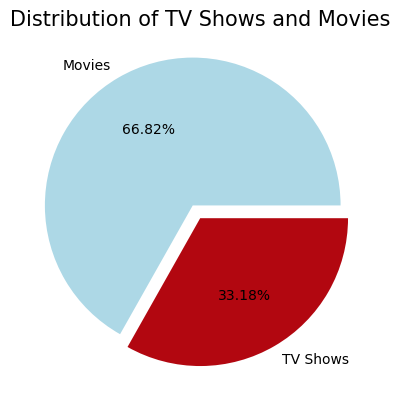

In [112]:
Vis_Category = Vis_Netflix['Type'].value_counts()
labels = ['Movies', 'TV Shows']
colours = ['lightblue', '#b20710']
explode = (0.1, 0)
plt.pie(Vis_Category, labels=labels, explode=explode, autopct='%2.2f%%',colors=colours)
plt.title('Distribution of TV Shows and Movies', fontsize=15)
plt.show()

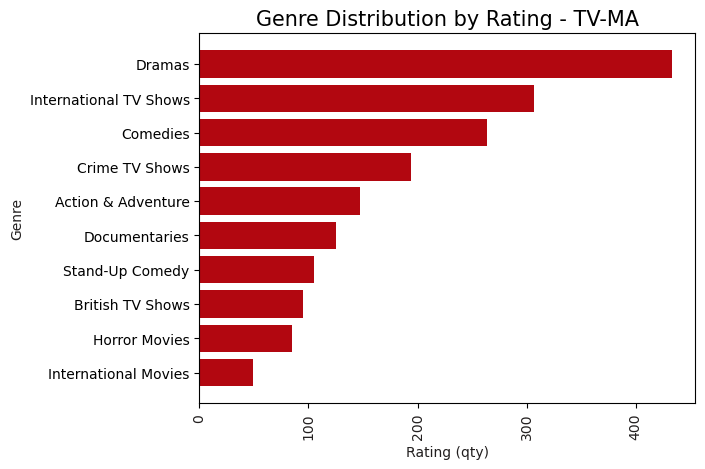

In [134]:
Vis_Rating = Vis_Netflix_Rating['Genre'].value_counts().reset_index().head(10).sort_values(ascending=True, by='Genre')
netflix_colors = ['#221f1f', '#b20710']

plt.barh(Vis_Rating['index'], Vis_Rating['Genre'], color=netflix_colors[1])
plt.title('Genre Distribution by Rating - TV-MA', fontsize=15)
plt.xlabel('Rating (qty)', color = netflix_colors[0])
plt.ylabel('Genre', color = netflix_colors[0])
plt.xticks(rotation=90, color = netflix_colors[0])
plt.show()

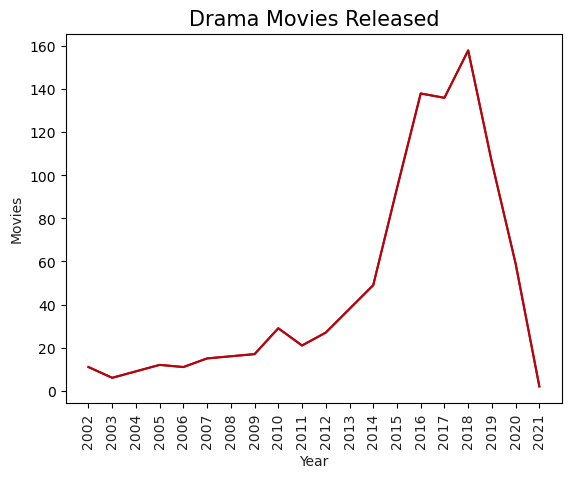

In [61]:
Vis_drama_year = Vis_Netflix_Drama['Release Year'].value_counts().reset_index().sort_values(by='index').tail(20)
netflix_colors = ['#221f1f', '#b20710']

plt.plot(Vis_drama_year['index'], Vis_drama_year['Release Year'], color=netflix_colors[1])
plt.plot(Vis_drama_year['index'], Vis_drama_year['Release Year'], color=netflix_colors[1])
plt.title('Drama Movies Released', fontsize=15)
plt.xlabel('Year', color = netflix_colors[0])
plt.ylabel('Movies', color = netflix_colors[0])
plt.xticks(Vis_drama_year['index'].astype(int), rotation=90, color=netflix_colors[0])
plt.show()

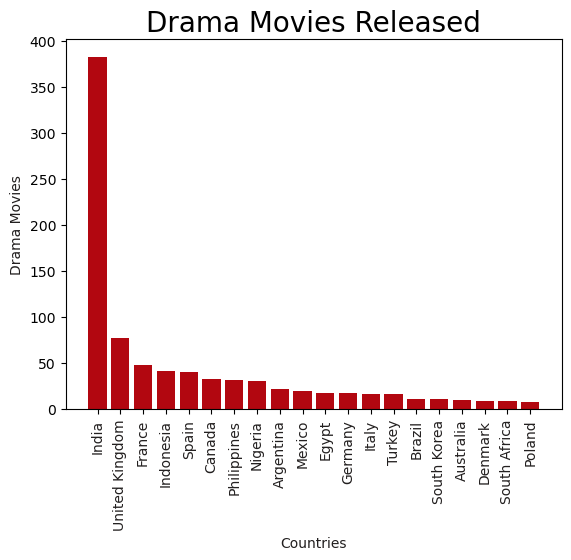

In [62]:
Vis_drama_country = Vis_Netflix_Drama['Country'].value_counts().reset_index().sort_values(ascending=False, by='Country').head(20)
netflix_colors = ['#221f1f', '#b20710']

plt.bar(Vis_drama_country['index'], Vis_drama_country['Country'], color=netflix_colors[1])
plt.title('Drama Movies Released', fontsize=20)
plt.xlabel('Countries', color = netflix_colors[0])
plt.ylabel('Drama Movies', color = netflix_colors[0])
plt.xticks(rotation=90, color = netflix_colors[0])
plt.show()

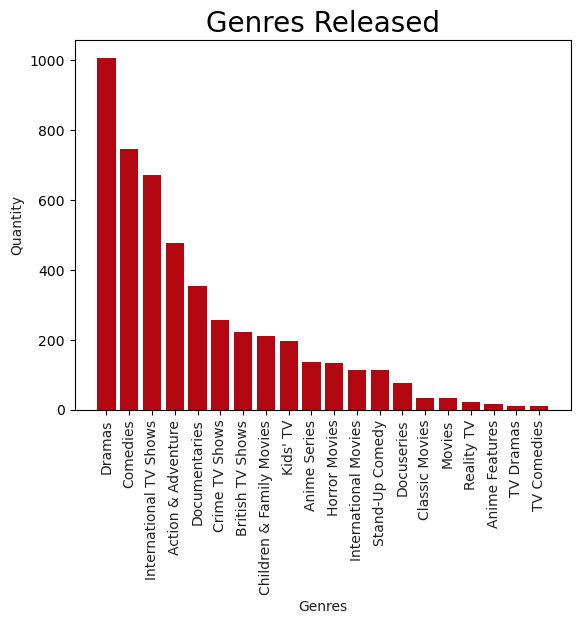

In [67]:
Vis_genre = Vis_Netflix['Genre'].value_counts().sort_values(ascending=False).head(20).reset_index()
netflix_colors = ['#221f1f', '#b20710']

plt.bar(Vis_genre['index'], Vis_genre['Genre'], color=netflix_colors[1])
plt.title('Genres Released', fontsize=20)
plt.xlabel('Genres', color = netflix_colors[0])
plt.ylabel('Quantity', color = netflix_colors[0])
plt.xticks(rotation=90, color = netflix_colors[0])
plt.show()

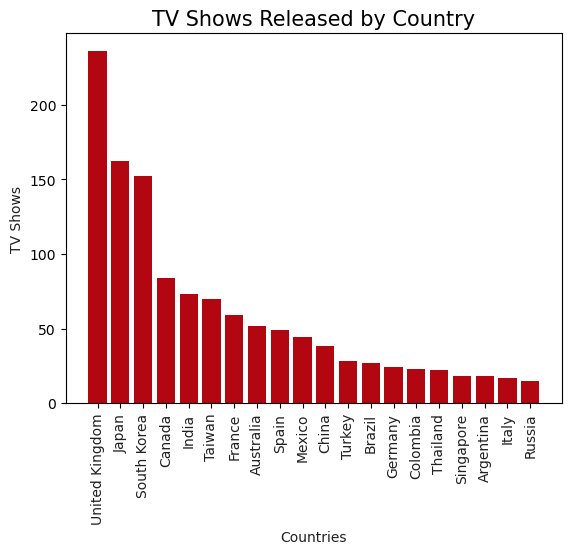

In [65]:
Vis_TV = Vis_Netflix_TV['Country'].value_counts().sort_values(ascending=False).head(20).reset_index()
netflix_colors = ['#221f1f', '#b20710']

plt.bar(Vis_TV['index'], Vis_TV['Country'], color=netflix_colors[1])
plt.title('TV Shows Released by Country', fontsize=15)
plt.xlabel('Countries', color = netflix_colors[0])
plt.ylabel('TV Shows', color = netflix_colors[0])
plt.xticks(rotation=90, color = netflix_colors[0])
plt.show()

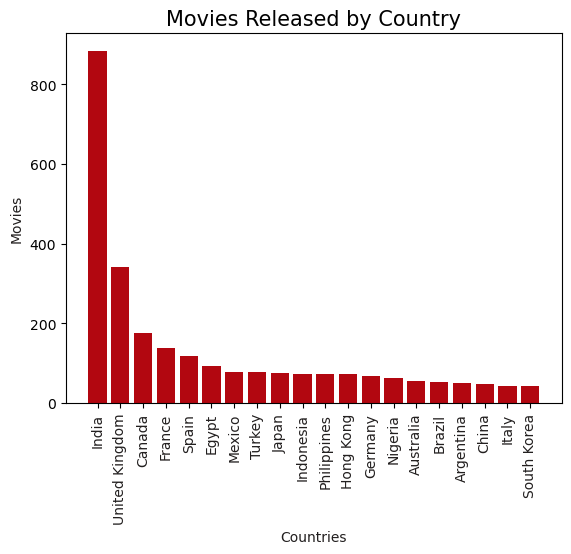

In [64]:
Vis_Movies = Vis_Netflix_Movie['Country'].value_counts().sort_values(ascending=False).head(20).reset_index()
netflix_colors = ['#221f1f', '#b20710']

plt.bar(Vis_Movies['index'], Vis_Movies['Country'], color=netflix_colors[1])
plt.title('Movies Released by Country', fontsize=15)
plt.xlabel('Countries', color = netflix_colors[0])
plt.ylabel('Movies', color = netflix_colors[0])
plt.xticks(rotation=90, color = netflix_colors[0])
plt.show()

## ~~USA

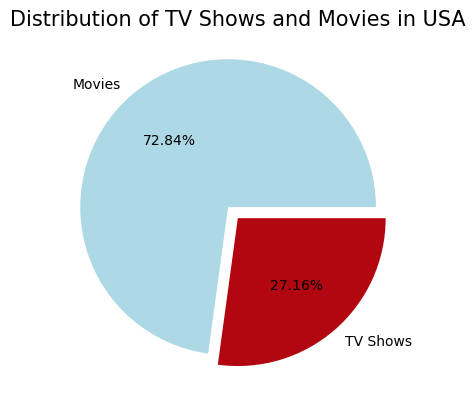

In [138]:
Vis_Category_USA = Vis_Netflix_USA['Type'].value_counts()
labels = ['Movies', 'TV Shows']
colours = ['lightblue', '#b20710']
explode = (0.1, 0)
plt.pie(Vis_Category_USA, labels=labels, explode=explode, autopct='%2.2f%%',colors=colours)
plt.title('Distribution of TV Shows and Movies in USA', fontsize=15)
plt.show()

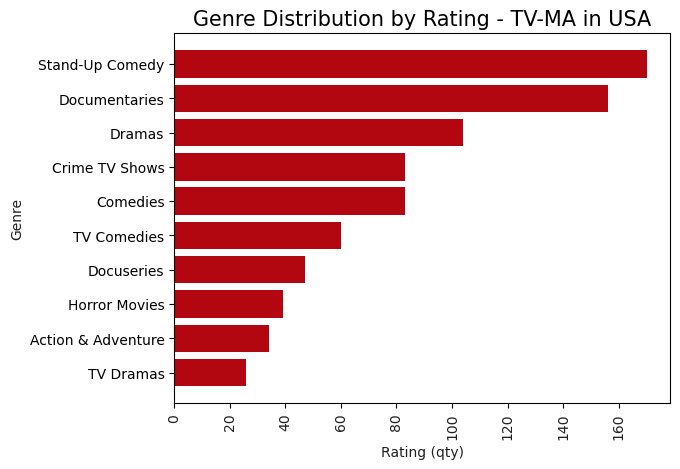

In [140]:
Vis_Rating_USA = Vis_Netflix_Rating_USA['Genre'].value_counts().reset_index().head(10).sort_values(ascending=True, by='Genre')
netflix_colors = ['#221f1f', '#b20710']

plt.barh(Vis_Rating_USA['index'], Vis_Rating_USA['Genre'], color=netflix_colors[1])
plt.title('Genre Distribution by Rating - TV-MA in USA', fontsize=15)
plt.xlabel('Rating (qty)', color = netflix_colors[0])
plt.ylabel('Genre', color = netflix_colors[0])
plt.xticks(rotation=90, color = netflix_colors[0])
plt.show()

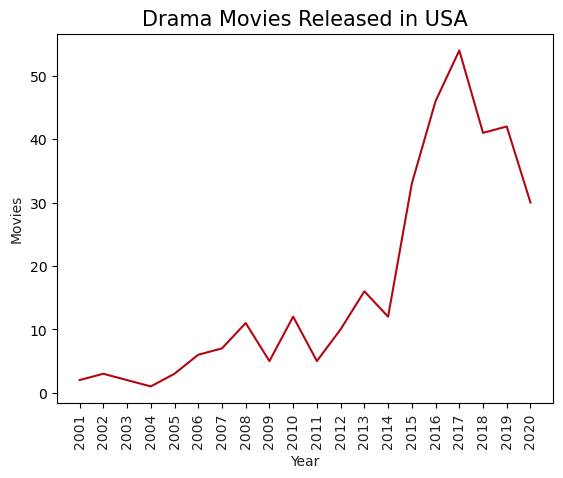

In [142]:
Vis_drama_year_USA = Vis_Netflix_Drama_USA['Release Year'].value_counts().reset_index().sort_values(by='index').tail(20)
netflix_colors = ['#221f1f', '#b20710']

plt.plot(Vis_drama_year_USA['index'], Vis_drama_year_USA['Release Year'], color=netflix_colors[1])
plt.title('Drama Movies Released in USA', fontsize=15)
plt.xlabel('Year', color = netflix_colors[0])
plt.ylabel('Movies', color = netflix_colors[0])
plt.xticks(Vis_drama_year_USA['index'].astype(int), rotation=90, color=netflix_colors[0])
plt.show()

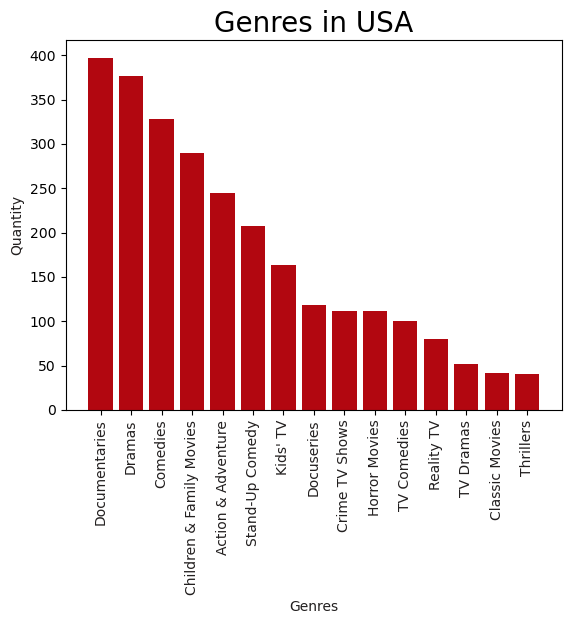

In [149]:
Vis_genre_USA = Vis_Netflix_USA['Genre'].value_counts().reset_index().sort_values(ascending=False, by='Genre').head(15)
netflix_colors = ['#221f1f', '#b20710']

plt.bar(Vis_genre_USA ['index'], Vis_genre_USA ['Genre'], color=netflix_colors[1])
plt.title('Genres in USA', fontsize=20)
plt.xlabel('Genres', color = netflix_colors[0])
plt.ylabel('Quantity', color = netflix_colors[0])
plt.xticks(rotation=90, color = netflix_colors[0])
plt.show()